In [2]:
import pickle
with open('Censo.pkl', 'rb') as f:
  X_treinamento, Y_treinamento, X_teste, Y_teste = pickle.load(f)

In [3]:
X_treinamento.shape, Y_treinamento.shape

((27676, 108), (27676,))

In [4]:
X_teste.shape, Y_teste.shape

((4885, 108), (4885,))

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
rede_neural_censo = MLPClassifier(verbose=True, max_iter=1000, tol=0.00001, hidden_layer_sizes=(55, 55))
rede_neural_censo.fit(X_treinamento, Y_treinamento)

Iteration 1, loss = 0.38552841
Iteration 2, loss = 0.32501346
Iteration 3, loss = 0.31294277
Iteration 4, loss = 0.30583378
Iteration 5, loss = 0.30106364
Iteration 6, loss = 0.29714324
Iteration 7, loss = 0.29387664
Iteration 8, loss = 0.29113968
Iteration 9, loss = 0.28898793
Iteration 10, loss = 0.28632684
Iteration 11, loss = 0.28417250
Iteration 12, loss = 0.28256848
Iteration 13, loss = 0.28081545
Iteration 14, loss = 0.27886403
Iteration 15, loss = 0.27930710
Iteration 16, loss = 0.27583821
Iteration 17, loss = 0.27301760
Iteration 18, loss = 0.27152242
Iteration 19, loss = 0.26981715
Iteration 20, loss = 0.26908859
Iteration 21, loss = 0.26697846
Iteration 22, loss = 0.26522936
Iteration 23, loss = 0.26426735
Iteration 24, loss = 0.26308315
Iteration 25, loss = 0.26136360
Iteration 26, loss = 0.25993916
Iteration 27, loss = 0.25944170
Iteration 28, loss = 0.25716945
Iteration 29, loss = 0.25634339
Iteration 30, loss = 0.25545937
Iteration 31, loss = 0.25382530
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [8]:
previsoes = rede_neural_censo.predict(X_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [9]:
Y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_teste, previsoes)

0.8227226202661208

0.8227226202661208

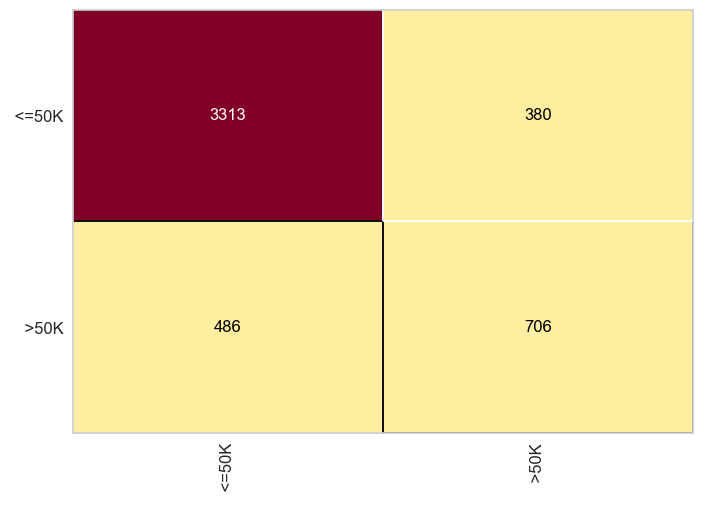

In [11]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_censo)
cm.fit(X_treinamento, Y_treinamento)
cm.score(X_teste, Y_teste)

In [12]:
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.65      0.59      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885

